In [1]:
import torch
import numpy as np

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
x_data

tensor([[1, 2],
        [3, 4]])

In [5]:
x_np

tensor([[1, 2],
        [3, 4]])

In [6]:
torch.ones_like(x_data)

tensor([[1, 1],
        [1, 1]])

In [7]:
torch.rand_like(x_data, dtype=torch.float)

tensor([[0.7503, 0.8044],
        [0.5859, 0.6584]])

In [8]:
torch.rand([2, 3])

tensor([[0.2047, 0.3183, 0.4819],
        [0.9914, 0.2725, 0.4949]])

In [9]:
x_data.to('cuda')

tensor([[1, 2],
        [3, 4]], device='cuda:0')

In [10]:
x_data

tensor([[1, 2],
        [3, 4]])

In [11]:
x_data.device

device(type='cpu')

In [12]:
x_data = x_data.to('cuda')

In [13]:
x_data.device

device(type='cuda', index=0)

In [14]:
x_data[0]

tensor([1, 2], device='cuda:0')

In [15]:
x_data[:, 0]

tensor([1, 3], device='cuda:0')

In [16]:
x_data[:, -1]

tensor([2, 4], device='cuda:0')

In [17]:
x_data[..., 0]

tensor([1, 3], device='cuda:0')

In [18]:
torch.cat([x_data, x_data], dim=0)

tensor([[1, 2],
        [3, 4],
        [1, 2],
        [3, 4]], device='cuda:0')

In [19]:
torch.stack([x_data, x_data])

tensor([[[1, 2],
         [3, 4]],

        [[1, 2],
         [3, 4]]], device='cuda:0')

In [20]:
x_data.T

tensor([[1, 3],
        [2, 4]], device='cuda:0')

In [22]:
x_cpu = x_data.to('cpu')

In [23]:
x_cpu @ x_cpu.T

tensor([[ 5, 11],
        [11, 25]])

In [25]:
x_data = x_data.type(torch.float)

In [26]:
x_data

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

In [27]:
x_data * x_data.T

tensor([[ 1.,  6.],
        [ 6., 16.]], device='cuda:0')

In [28]:
x_data.sum()

tensor(10., device='cuda:0')

In [29]:
x_data[0].sum().item()

3.0

In [30]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [44]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [32]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

<Figure size 800x800 with 0 Axes>

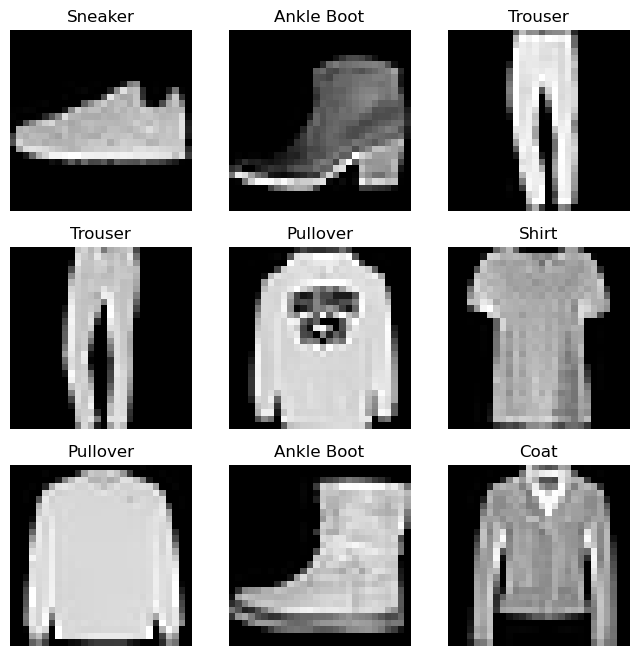

In [33]:
import random
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 8))

for i, (img, label) in enumerate(random.choices(training_data, k=cols*rows), 1):
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [34]:
random.choices([1, 2, 3], k=2)

[3, 3]

In [35]:
for i, (img, label) in enumerate(random.choices(training_data, k=cols*rows), 1):
     print(i, img.shape, label)

1 torch.Size([1, 28, 28]) 9
2 torch.Size([1, 28, 28]) 2
3 torch.Size([1, 28, 28]) 1
4 torch.Size([1, 28, 28]) 9
5 torch.Size([1, 28, 28]) 8
6 torch.Size([1, 28, 28]) 1
7 torch.Size([1, 28, 28]) 0
8 torch.Size([1, 28, 28]) 7
9 torch.Size([1, 28, 28]) 1


In [36]:
from torch.utils.data import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
features, labels = next(iter(train_loader))

In [47]:
features[0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0039,
         0.0000, 0.0000, 0.5216, 0.8824, 0.8588, 0.8667, 0.9255, 0.9490, 0.0000,
         0.0000, 0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.1961, 0.8039, 0.9059, 0.9098, 0.9608, 0.9725, 0.9216, 0.5412,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0235, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0980, 0.5725,
         0.9137, 0.8941, 0.8392, 0.8157, 0.8431, 0.8627, 0.9255, 0.8000, 0.9137,
         1.0000, 0.7451, 0.3490, 0.0000, 0.0000, 0.0000

In [40]:
labels.shape

torch.Size([32])

In [41]:
labels

tensor([0, 5, 1, 0, 1, 7, 2, 0, 6, 1, 0, 1, 9, 6, 6, 9, 9, 5, 2, 4, 5, 0, 5, 1,
        1, 3, 3, 4, 6, 0, 4, 3])